In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note : Use the drive link for the processed dataset

In [1]:
!pip install numpy

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 17.0 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=2b8f3c05538fb36af781bec402c522f3cdcecbd9ce0fe913399de53d3ee03996
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
import glob
import torch
from torchvision import transforms
import os
import numpy as np
import cv2
import shutil

def validate_video(vid_path, train_transforms):
    count = 20
    frames = []
    a = int(100 / count)
    for i, frame in enumerate(frame_extract(vid_path)):
        frames.append(train_transforms(frame))
        if len(frames) == count:
            break
    if len(frames) < count:
        raise ValueError("Not enough frames extracted.")
    frames = torch.stack(frames)
    return frames[:count]
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = True
    while success:
        success, image = vidObj.read()
        if success:
            yield image
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
video_files = glob.glob('/content/drive/My Drive/Hello_World/*.mp4')
corrupted_folder = '/content/drive/My Drive/Hello_World/corrupted_videos/'
os.makedirs(corrupted_folder, exist_ok=True)
print("Total no of videos:", len(video_files))
corrupted_count = 0
for idx, video_path in enumerate(video_files):
    try:
        validate_video(video_path, train_transforms)
        print(f"[{idx+1}/{len(video_files)}] OK: {os.path.basename(video_path)}")
    except Exception as e:
        corrupted_count += 1
        print(f"[{idx+1}/{len(video_files)}] Corrupted: {os.path.basename(video_path)} — {str(e)}")
        try:
            shutil.move(video_path, os.path.join(corrupted_folder, os.path.basename(video_path)))
            print(f"Moved to: {corrupted_folder}")
        except Exception as move_err:
            print(f"Failed to move file: {move_err}")

print("Total Corrupted Videos Moved:", corrupted_count)

Total no of videos: 144
[1/144] OK: 01_02__outside_talking_still_laughing__YVGY8LOK.mp4
[2/144] OK: 01_02__walk_down_hall_angry__YVGY8LOK.mp4
[3/144] OK: 01_27__hugging_happy__ZYCZ30C0.mp4
[4/144] OK: 01_11__secret_conversation__4OJNJLOO.mp4
[5/144] OK: 01_21__walk_down_hall_angry__03X7CELV.mp4
[6/144] OK: 01_12__outside_talking_pan_laughing__TNI7KUZ6.mp4
[7/144] OK: 01_11__talking_against_wall__9229VVZ3.mp4
[8/144] OK: 01_11__meeting_serious__9OM3VE0Y.mp4
[9/144] OK: 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
[10/144] OK: 01_03__hugging_happy__ISF9SP4G.mp4
[11/144] OK: 01_03__talking_against_wall__JZUXXFRB.mp4
[12/144] OK: 01_03__podium_speech_happy__480LQD1C.mp4
[13/144] OK: 01_20__outside_talking_pan_laughing__OTGHOG4Z.mp4
[14/144] OK: 01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4
[15/144] OK: 01_27__outside_talking_still_laughing__ZYCZ30C0.mp4
[16/144] OK: 02_06__talking_angry_couch__MKZTXQ2T.mp4
[17/144] OK: 02_06__podium_speech_happy__N8OSN8P6.mp4
[18/144] OK: 02_0

In [ ]:
import glob
import numpy as np
import cv2
import random
video_files = glob.glob('/kaggle/input/preprocessed-deep-detection/Hello_World/*.mp4')

random.shuffle(video_files)
frame_counts = []
for video_file in video_files:
    cap = cv2.VideoCapture(video_file)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_counts.append(frames)
print("Total videos found:", len(video_files))
print("Frames per video:", frame_counts)
print("Average frames per video:", np.mean(frame_counts))

Total videos found: 144
Frames per video: [150, 37, 265, 300, 37, 37, 37, 37, 750, 37, 37, 750, 37, 300, 727, 36, 37, 300, 37, 37, 150, 37, 37, 37, 37, 300, 300, 37, 300, 37, 36, 37, 37, 37, 150, 37, 300, 37, 37, 37, 37, 37, 38, 300, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 150, 37, 37, 37, 300, 300, 37, 300, 300, 37, 34, 37, 37, 64, 37, 37, 300, 300, 37, 37, 37, 300, 37, 299, 300, 37, 750, 37, 75, 605, 35, 300, 225, 34, 37, 300, 100, 37, 37, 291, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 258, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 150, 37, 37, 37, 150, 225, 37, 75, 35, 37, 37, 37, 37, 300, 37, 37, 37, 37, 37, 37, 240, 37, 37, 75, 37]
Average frames per video: 112.05555555555556


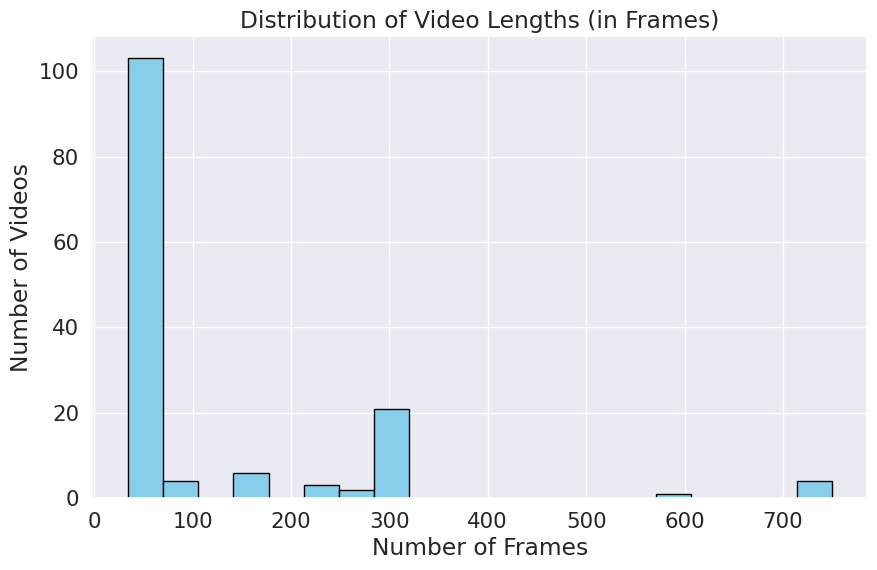

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(frame_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Video Lengths (in Frames)")
plt.xlabel("Number of Frames")
plt.ylabel("Number of Videos")
plt.grid(True)
plt.show()

In [ ]:

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/kaggle/input/final-csv/merged_shuffled_video_labels.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  115
test :  29
TRAIN:  Real: 41  Fake: 74
TEST:  Real: 12  Fake: 17


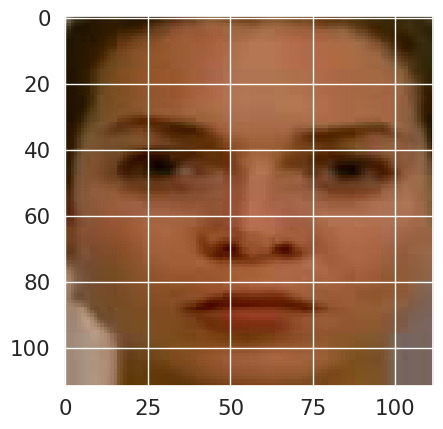

In [ ]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/kaggle/input/final-csv/merged_shuffled_video_labels.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

CUDA available: True
GPU name: Tesla T4


In [ ]:
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        from torchvision.models import ResNeXt50_32X4D_Weights
        weights = ResNeXt50_32X4D_Weights.DEFAULT
        model = torchvision.models.resnext50_32x4d(weights=weights)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [91]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

In [92]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [94]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/25] [Batch 28 / 29] [Loss: 0.695614, Acc: 62.61%]Testing
[Batch 7 / 8]  [Loss: 0.682982, Acc: 55.17%]
Accuracy 55.172413793103445
[Epoch 2/25] [Batch 28 / 29] [Loss: 0.646988, Acc: 68.70%]Testing
[Batch 7 / 8]  [Loss: 0.643827, Acc: 62.07%]]
Accuracy 62.06896551724138
[Epoch 3/25] [Batch 28 / 29] [Loss: 0.505955, Acc: 72.17%]Testing
[Batch 7 / 8]  [Loss: 0.537581, Acc: 72.41%]
Accuracy 72.41379310344827
[Epoch 4/25] [Batch 28 / 29] [Loss: 0.446242, Acc: 86.96%]Testing
[Batch 7 / 8]  [Loss: 0.511133, Acc: 72.41%]
Accuracy 72.41379310344827
[Epoch 5/25] [Batch 28 / 29] [Loss: 0.511792, Acc: 82.61%]Testing
[Batch 7 / 8]  [Loss: 0.583069, Acc: 65.52%]
Accuracy 65.51724137931035
[Epoch 6/25] [Batch 28 / 29] [Loss: 0.382199, Acc: 87.83%]Testing
[Batch 7 / 8]  [Loss: 0.613836, Acc: 75.86%]]
Accuracy 75.86206896551724
[Epoch 7/25] [Batch 28 / 29] [Loss: 0.332601, Acc: 87.83%]Testing
[Batch 7 / 8]  [Loss: 0.579522, Acc: 79.31%]
Accuracy 79.3103448275862
[Epoch 8/25] [Batch 28 / 29] [Lo

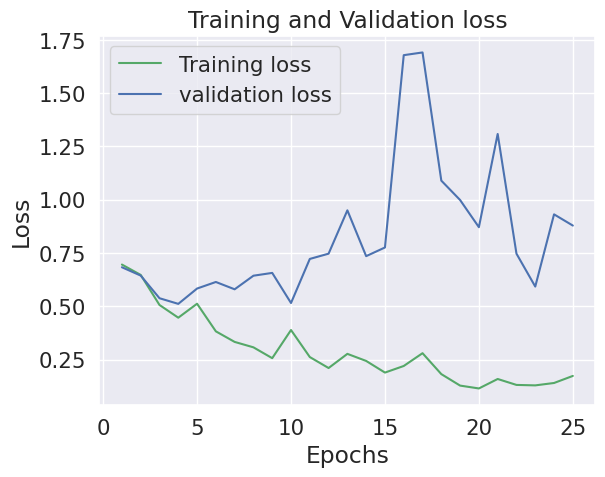

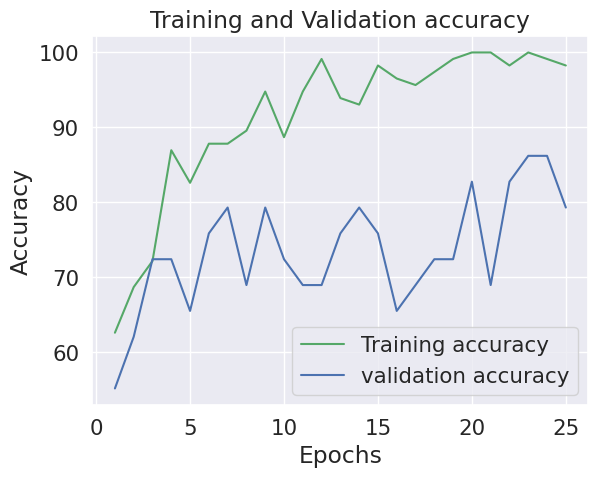

[[13  4]
 [ 2 10]]
True positive =  13
False positive =  4
False negative =  2
True negative =  10




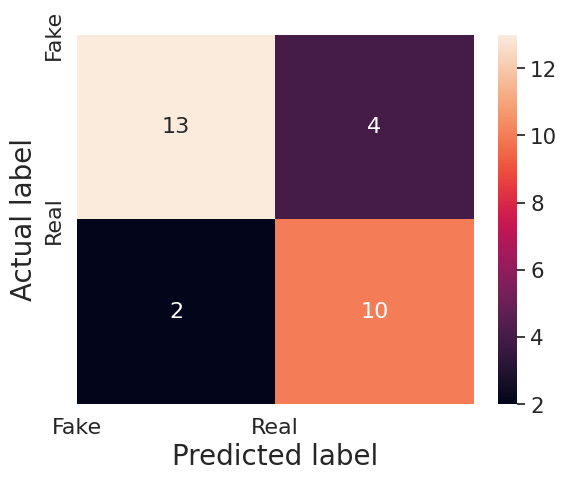

Calculated Accuracy 79.3103448275862


In [ ]:
from sklearn.metrics import confusion_matrix
lr = 1e-4
num_epochs = 25
optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-4)
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)